In [1]:
#載入所需函示庫

#載入所需函示庫
from matplotlib import pyplot as plt
%matplotlib inline
# 設定圖形大小; DPI越大圖越大
plt.rcParams["figure.dpi"] = 60
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as smm
import statsmodels.stats.outliers_influence as sso
import statsmodels
import statistics
import math

In [2]:
def runsTest(l, l_median): 
    runs, n1, n2 = 1, 0, 0
    if(l[0]) >= l_median:
        n1 += 1   
    else:
        n2 += 1   
    for i in range(1, len(l)): 
        if (l[i] >= l_median and l[i-1] < l_median) or (l[i] < l_median and l[i-1] >= l_median):
            runs += 1  
        if(l[i]) >= l_median: 
            n1 += 1   
        else: 
            n2 += 1   
    runs_exp = ((2*n1*n2)/(n1+n2)) + 1
    stan_dev = math.sqrt((2*n1*n2*(2*n1*n2-n1-n2))/(((n1+n2)**2)*(n1+n2-1))) 
    z = (runs-runs_exp)/stan_dev
    pval_z = stats.norm.sf(abs(z)) * 2
    print('runs = ', runs)
    print('n1 = ', n1)
    print('n2 = ', n2)
    print('runs_exp = ', runs_exp)
    print('stan_dev = ', stan_dev)
    print('z = ', z)
    print('pval_z = ', pval_z)
    return pval_z

In [3]:
def Durbin_Watson_test(x):
    x_square_sum = np.vdot(x, x)
    print("x_square_sum = ", x_square_sum)
    size = x.size
    print("size = ", size)
    x_d = np.zeros((size))
    print("x_d = ", x_d)
    l_size = size - 1
    for i in range(l_size):
        x_d[i + 1] = x[i + 1] - x[i]
    print("x_d = ", x_d)
    d = np.vdot(x_d, x_d) / x_square_sum
    print("d = ", d)
    return(d)

### 評分標準：  
本次作業因為本週重點在於類別資料的分析，故不要求同學做出前兩週的所有檢定，但同學有寫這部分的話我還是有批改，有問題的部分圈出但不扣分，參考解答也有全部寫出來，可以自行參考。
*  18.17: regression model 10%, (b)~(d)各 4%  
*  18.21: regression model 10%, (b)~(c)各 4%  
*  18.35: regression model 10%, (b)~(c)各 4%  
*  18.39: regression model(17.17) 10%, regression model(stepwise) 10%, (b) 4%  
*  18.47: regression model 10%, (b) 4%  
另外，每題的regression model部分，若散佈圖沒畫或有誤 -3%。  

### 常見問題：  
1.  independent variable, dependent variable 千萬不要再忘記了，最好一開始就寫，全錯很可惜，期末考沒寫我們也不會手軟會直接給全錯。
2.  Run test applying normal dist. 使用時機：n1>20 or n1>20，注意要「大於」，等於的情況還是可以用Run table。
3.  Durbin_Watson_test查表要小心，單尾查5%的表、雙尾查2.5%的表，另外也要注意查的表K有沒有includes intercept。
4.  針對independent variable的檢定單尾雙尾不同，（可參考18.17(c)(d)），兩種情況的H0H1, pvalue都不同，無法互用，單尾的檢定不可以直接用summary中的pvalue，而是要將其/2才是單尾的pvalue，這次很多單尾的檢定，卻只有少數同學做出來，大家要再多注意題目的意思。
5.  請「獨立」完成作業，也不要在那邊東湊西湊，自己理解寫出來考試的時候才會是自己的！

# 18.17  
X(independent variable) - Yest Att(x1), I1(x2), I2(x3), I3(x4)   
y(dependent variable) - Attendence

I1 = 1 if weekend, = 0 if not.  
I2 = 1 if mostly sunny is predicted, = 0 if not.  
I3 = 1 if rain is predicted, = 0 if not.

In [4]:
#讀取資料集
df = pd.read_excel('Xr18-17.xlsx')
print('Dataset(head):')
display(df.head())
print('Dataset(tail):')
display(df.tail())

Dataset(head):


,Attendance,Yest Att,I1,I2,I3
0,7882,8876,0,1,0
1,6115,7203,0,0,0
2,5351,4370,0,0,0
3,8546,7192,1,1,0
4,6022,6835,0,0,0


Dataset(tail):


,Attendance,Yest Att,I1,I2,I3
35,6859,3803,1,1,1
36,6883,7476,1,1,1
37,8352,7075,1,1,0
38,9659,8859,1,1,0
39,5627,7696,0,1,0


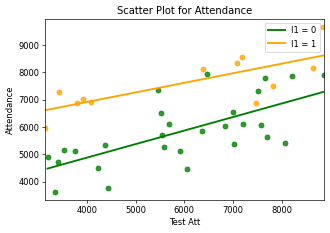

In [5]:
df_I10 = df[df.I1 == 0]
df_I11 = df[df.I1 == 1]

_ = sns.regplot(x='Yest Att', y= 'Attendance', data = df_I10, color = 'green', ci = None)
_ = sns.regplot(x='Yest Att', y= 'Attendance', data = df_I11, color = 'orange', ci = None)
plt.legend(labels=['I1 = 0', 'I1 = 1'])
plt.title('Scatter Plot for Attendance')
plt.xlabel('Test Att')
plt.ylabel('Attendance')
plt.show()

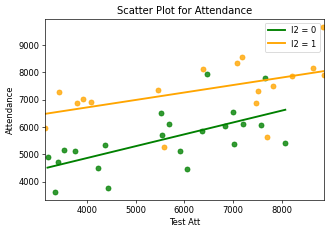

In [6]:
df_I20 = df[df.I2 == 0]
df_I21 = df[df.I2 == 1]

_ = sns.regplot(x='Yest Att', y= 'Attendance', data = df_I20, color = 'green', ci = None)
_ = sns.regplot(x='Yest Att', y= 'Attendance', data = df_I21, color = 'orange', ci = None)
plt.legend(labels=['I2 = 0', 'I2 = 1'])
plt.title('Scatter Plot for Attendance')
plt.xlabel('Test Att')
plt.ylabel('Attendance')
plt.show()

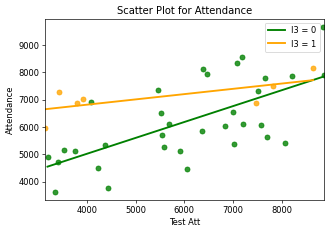

In [7]:
df_I30 = df[df.I3 == 0]
df_I31 = df[df.I3 == 1]

_ = sns.regplot(x='Yest Att', y= 'Attendance', data = df_I30, color = 'green', ci = None)
_ = sns.regplot(x='Yest Att', y= 'Attendance', data = df_I31, color = 'orange', ci = None)
plt.legend(labels=['I3 = 0', 'I3 = 1'])
plt.title('Scatter Plot for Attendance')
plt.xlabel('Test Att')
plt.ylabel('Attendance')
plt.show()

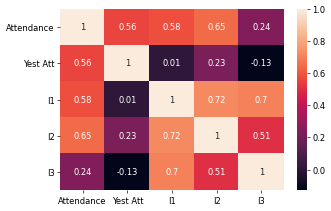

In [8]:
corr = df.corr()
_ = sns.heatmap(corr, annot=True)

Attendance = $\beta 0 $ + $\beta 1 $ x1 + $\beta 2 $ x2 + $\beta 3 $ x3 + $\beta 4 $ x4 + $\epsilon$

In [9]:
y = df['Attendance']
xnames = ['Yest Att', 'I1', 'I2', 'I3']
X_ar = np.array([df['Yest Att'], df['I1'], df['I2'], df['I3']])
X_T =X_ar.T
X = pd.DataFrame(X_T,columns = xnames)
X = sm.add_constant(X)

olsmod = sm.OLS(y, X)
result = olsmod.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:             Attendance   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     20.43
Date:                Sat, 12 Jun 2021   Prob (F-statistic):           9.28e-09
Time:                        18:57:13   Log-Likelihood:                -322.01
No. Observations:                  40   AIC:                             654.0
Df Residuals:                      35   BIC:                             662.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3490.4666    469.155      7.440      0.0

In [10]:
print("Estimated model: y = %0.4f" % (result.params[0]), end = ' ')
for c, x in zip(result.params[1:], list(range(1,len(xnames)+1))):
    print('+', end = '') if c> 0 else print('-', end = '')
    print(" %0.4f x%d " % (abs(c), x), end = '') 

Estimated model: y = 3490.4666 + 0.3685 x1 + 1623.0958 x2 + 733.4646 x3 - 765.5429 x4 

### Requirements check. 
#### Multicollinearity  
The correlation between I1&I2 and I1&I3 are larger than 0.7.  
And the signs for I3's correlation coefficients and coefficients are different.  
Thus, Multicollinearity prolblem exists.  

In [11]:
st, data, ss2 = sso.summary_table(result, alpha=0.05)
#Predicted value
y_pre = data[:, 2]
#Studentized Residual
SD = data[:, 10]

#### Normality
H0 : Normal distributed  
H1 : Not normal distributed 

In [12]:
stat, p = stats.shapiro(SD)
print('Shapiro Test: Statistics=%f, p=%f' % (stat, p))

Shapiro Test: Statistics=0.978497, p=0.633872


Since p-value > alpha = 0.05, we can not reject H0 at significance level at alpha = 0.05.  
There is no evidence to show that it is not normally distributed.  
#### Homoscedasticity
H0 : Homoscedasticity  
H1 : Not Homoscedasticity

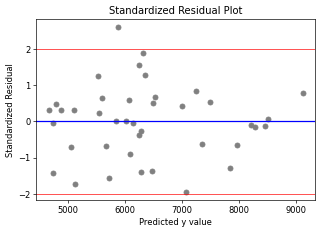

In [13]:
plt.plot(y_pre, SD, 'o', color = 'gray')
plt.axhline(y=2, color = 'red', lw = 0.8)
plt.axhline(y=0, color = 'blue')
plt.axhline(y=-2, color = 'red', lw = 0.8)
plt.title('Standardized Residual Plot')
plt.xlabel('Predicted y value')
plt.ylabel('Standardized Residual')
plt.show()

We do not reject H0. We can assume the variation is constant and the mean is around 0.
#### Independence
H0 : Independence  
H1 : Not independence  

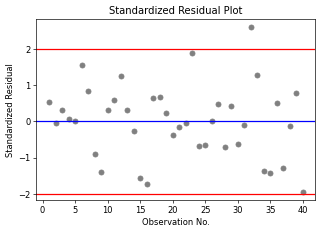

runs =  22
n1 =  20
n2 =  20
runs_exp =  21.0
stan_dev =  3.1214723679042464
z =  0.3203616377585937
pval_z =  0.7486942029213925
p_value for Z-statistic=  0.7486942029213925


In [14]:
Id = data[:, 0]
plt.plot(Id, SD, 'o', color = 'gray')
plt.axhline(y=0, color = 'blue')
plt.axhline(y=2, color = 'red')
plt.axhline(y=-2, color = 'red')
plt.title('Standardized Residual Plot')
plt.xlabel('Observation No.')
plt.ylabel('Standardized Residual')
plt.show()

SD_median = statistics.median(SD)
Z_pval = runsTest(SD, SD_median) 
print('p_value for Z-statistic= ', Z_pval)

Since n1<=20 and n2<=20, we check with run table.  
lower bound = 14 < runs = 22 < upper bound =28  
Thus, there is no evidence to infer the sample is not random selected.  

#### Autocorreltaion
H0: The data are not first-order correlated  
H1: The data are first-order correlated  

In [15]:
d = Durbin_Watson_test(SD)
print(d)

x_square_sum =  39.36649493261561
size =  40
x_d =  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x_d =  [ 0.         -0.56921112  0.35640705 -0.25110808 -0.05088851  1.5342232
 -0.70470211 -1.74162452 -0.510848    1.73041635  0.26719856  0.65074066
 -0.93286967 -0.57254361 -1.30796309 -0.14628656  2.36967812  0.00703774
 -0.42941924 -0.60433628  0.22199351  0.12051709  1.91911255 -2.5787227
  0.04304334  0.66895494  0.46392508 -1.19537446  1.14772331 -1.04943781
  0.52244583  2.6986953  -1.32000477 -2.65189714 -0.04932466  1.92217898
 -1.80761607  1.15772509  0.91653265 -2.71394816]
d =  1.7018516662265162
1.7018516662265162


size = 40, k = 5(includes intercept), dL = 1.1971, dU = 1.6264  
Since dU < d= 1.7018516662265162 < 4-dU, we can not reject H0.  
Thus, there is not enough evidence to infer that first order auto-correlation exist.

#### Outliers 

In [16]:
df_c = pd.DataFrame(SD,columns = ['SD'])
filter = (df_c['SD'] < -2) | (df_c['SD'] > 2)
print("Outliers by SD = \n")
print(df_c['SD'].loc[filter])

Outliers by SD = 

31    2.607494
Name: SD, dtype: float64


#### Influential Observations

In [17]:
X = np.array(X)
H = np.matmul(X, np.linalg.solve(np.matmul(X.T, X), X.T))
df['hii'] = np.diagonal(H)
df_h = pd.DataFrame(df['hii'])
k = result.df_model
n = len(df_h['hii'])
h_level = 3 * (k+1) / n 
print("h_level = ", h_level)
print(" \n")
filter = (df_h['hii'] > h_level )
print("Influential Observations by hi = \n")
print(df_h['hii'].loc[filter])

h_level =  0.375
 

Influential Observations by hi = 

Series([], Name: hii, dtype: float64)


In [18]:
s2_e = result.mse_resid
k = result.df_model
y_a = data[:, 1]
y_f = data[:, 2]
h_i = df['hii']
CD_arr = np.square(y_a - y_f) / s2_e / (k - 1) * h_i / np.square(1 - h_i)
CD = np.array(CD_arr)
df_cd = pd.DataFrame(CD,columns = ['CD'])
filter = (df_cd['CD'] > 1 )
print("Influential Observations by Cook's Distances = \n")
print(df_cd['CD'].loc[filter])

Influential Observations by Cook's Distances = 

Series([], Name: CD, dtype: float64)


### (b)

In [19]:
print('Standard errors:', result.mse_resid ** 0.5)
print('Y_bar:', df["Attendance"].mean())

Standard errors: 810.7745532288866
Y_bar: 6370.025


Compared to y_bar, Se is relatively small. Hence our regression model of is good. 

In [20]:
print("R2:", result.rsquared)
print("adjusted R2:", result.rsquared_adj)

R2: 0.7001779289206772
adjusted R2: 0.6659125493687545


70.02% of the variation in attendance is explained by the model.  
| R2 - adjusted R2 | < 0.06, which indicates model doesn't have problem of over-fitting.

H0 : $\beta i $  = 0 for i in [1,4]  
H1 : exists at least one $\beta i$  != 0 for i in [1,4]  
$\alpha$ = 0.05

In [21]:
print("F-statistics:", result.fvalue)
print("p-value:",result.f_pvalue)

F-statistics: 20.433975577585297
p-value: 9.277499131522486e-09


Since p-value < alpha = 0.05, we reject H0 at significance level at alpha = 0.05.  
There is enough evidence to conclude that the model is valid.

### (c)  
H0 : $\beta i$  = 0 for i in [1,4]  
H1 : $\beta i$  != 0 for i in [1,4]  
$\alpha$ = 0.05

In [22]:
for x, p in zip(xnames, result.pvalues[1:]):
    print("p-value of %s = %0.4f" % (x, p))
    if p < 0.05:
        print("  Since p-value < alpha = 0.05, we reject H0 at significance level at alpha = 0.05.")
    else:
        print("  Since p-value > alpha = 0.05, we can not reject H0 at significance level at alpha = 0.05.")

p-value of Yest Att = 0.0000
  Since p-value < alpha = 0.05, we reject H0 at significance level at alpha = 0.05.
p-value of I1 = 0.0023
  Since p-value < alpha = 0.05, we reject H0 at significance level at alpha = 0.05.
p-value of I2 = 0.0713
  Since p-value > alpha = 0.05, we can not reject H0 at significance level at alpha = 0.05.
p-value of I3 = 0.1232
  Since p-value > alpha = 0.05, we can not reject H0 at significance level at alpha = 0.05.


Thus, Yesterday Attendance and Weekend arr not are factors in attendance, while weather is not.  
### (d)  
H0 : $\beta 2$  = 0   
H1 : $\beta 2$  > 0   
$\alpha$ = 0.05  
Since p-value = .0023/2 = .0012 < 0.05, we can reject H0 at significance level at alpha = 0.05.  
There is sufficient evidence to infer that weekend attendance is larger than weekday attendance.

# 18.21   
X(independent variable) - Age(x1), I1(x2), I2(x3)   
y(dependent variable) - Cost of repairs (assume unit=dollar)

I1 = 1 if welding machine, = 0 otherwise  
I2 = 1 if lathe, = 0 otherwise  

In [23]:
#讀取資料集
df = pd.read_excel('Xr18-21.xlsx')
print('Dataset(head):')
display(df.head())
print('Dataset(tail):')
display(df.tail())

Dataset(head):


,Repairs,Age,Machine
0,327.67,110,1
1,376.68,113,1
2,392.52,114,1
3,443.14,134,1
4,342.62,93,1


Dataset(tail):


,Repairs,Age,Machine
55,363.88,85,3
56,309.87,84,3
57,326.90,68,3
58,292.97,73,3
59,354.35,89,3


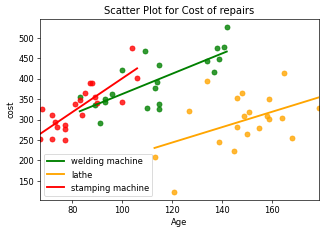

In [24]:
df_M1 = df[df.Machine == 1]
df_M2 = df[df.Machine == 2]
df_M3 = df[df.Machine == 3]

_ = sns.regplot(x='Age', y= 'Repairs', data = df_M1, color = 'green', ci = None)
_ = sns.regplot(x='Age', y= 'Repairs', data = df_M2, color = 'orange', ci = None)
_ = sns.regplot(x='Age', y= 'Repairs', data = df_M3, color = 'red', ci = None)
plt.legend(labels=['welding machine', 'lathe', 'stamping machine'])
plt.title('Scatter Plot for Cost of repairs')
plt.xlabel('Age')
plt.ylabel('cost')
plt.show()

In [25]:
dummy = pd.get_dummies(df['Machine'], prefix = 'I')
df = pd.concat([df, dummy], axis = 1)
df = df.drop(columns=['Machine', 'I_3'])

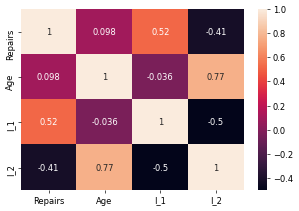

In [26]:
corr = df.corr()
_ = sns.heatmap(corr, annot=True)

Cost = $\beta 0 $ + $\beta 1 $ x1 + $\beta 2 $ x2 + $\beta 3 $ x3 + $\epsilon$

In [27]:
y = df['Repairs']
xnames = ['Age', 'I_1', 'I_2']
X_ar = np.array([df['Age'], df['I_1'], df['I_2']])
X_T =X_ar.T
X = pd.DataFrame(X_T,columns = xnames)
X = sm.add_constant(X)

olsmod = sm.OLS(y, X)
result = olsmod.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                Repairs   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.572
Method:                 Least Squares   F-statistic:                     27.29
Date:                Sat, 12 Jun 2021   Prob (F-statistic):           5.24e-11
Time:                        18:57:13   Log-Likelihood:                -316.07
No. Observations:                  60   AIC:                             640.1
Df Residuals:                      56   BIC:                             648.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        119.2521     35.000      3.407      0.0

In [28]:
print("Estimated model: y = %0.4f" % (result.params[0]), end = ' ')
for c, x in zip(result.params[1:], list(range(1,len(xnames)+1))):
    print('+', end = '') if c> 0 else print('-', end = '')
    print(" %0.4f x%d " % (abs(c), x), end = '') 

Estimated model: y = 119.2521 + 2.5382 x1 - 11.7553 x2 - 199.3737 x3 

### Requirements check. 
#### Multicollinearity  
The correlation between Age&I2 is larger than 0.7.  
And the signs for I1's correlation coefficients and coefficients are different.  
Thus, Multicollinearity prolblem exists.  

In [29]:
st, data, ss2 = sso.summary_table(result, alpha=0.05)
#Predicted value
y_pre = data[:, 2]
#Studentized Residual
SD = data[:, 10]

#### Normality
H0 : Normal distributed  
H1 : Not normal distributed 

In [30]:
stat, p = stats.shapiro(SD)
print('Shapiro Test: Statistics=%f, p=%f' % (stat, p))

Shapiro Test: Statistics=0.989116, p=0.871042


Since p-value > alpha = 0.05, we can not reject H0 at significance level at alpha = 0.05.  
There is no evidence to show that it is not normally distributed.  
#### Homoscedasticity
H0 : Homoscedasticity  
H1 : Not Homoscedasticity

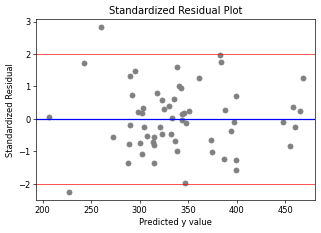

In [31]:
plt.plot(y_pre, SD, 'o', color = 'gray')
plt.axhline(y=2, color = 'red', lw = 0.8)
plt.axhline(y=0, color = 'blue')
plt.axhline(y=-2, color = 'red', lw = 0.8)
plt.title('Standardized Residual Plot')
plt.xlabel('Predicted y value')
plt.ylabel('Standardized Residual')
plt.show()

We do not reject H0. We can assume the variation is constant and the mean is around 0.
#### Independence
H0 : Independence  
H1 : Not independence  

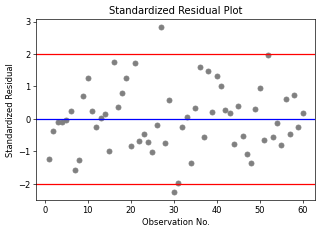

runs =  32
n1 =  30
n2 =  30
runs_exp =  31.0
stan_dev =  3.8400211863822324
z =  0.2604152298810939
pval_z =  0.7945434963754624
p_value for Z-statistic=  0.7945434963754624


In [32]:
Id = data[:, 0]
plt.plot(Id, SD, 'o', color = 'gray')
plt.axhline(y=0, color = 'blue')
plt.axhline(y=2, color = 'red')
plt.axhline(y=-2, color = 'red')
plt.title('Standardized Residual Plot')
plt.xlabel('Observation No.')
plt.ylabel('Standardized Residual')
plt.show()

SD_median = statistics.median(SD)
Z_pval = runsTest(SD, SD_median) 
print('p_value for Z-statistic= ', Z_pval)

Since n1>20 and n2>20, we apply run test with normal dist.  
The p-value>alpha = 0.05, we can not reject H0.  
Thus, there is no evidence to infer the sample is not random selected.  

#### Autocorreltaion
H0: The data are not first-order correlated  
H1: The data are first-order correlated  


In [33]:
d = Durbin_Watson_test(SD)
print(d)

x_square_sum =  60.11842077837835
size =  60
x_d =  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x_d =  [ 0.          0.87454011  0.28085902 -0.00454276  0.07609324  0.25398702
 -1.81041796  0.30069853  1.99487293  0.55311339 -1.03204448 -0.49012031
  0.29026697  0.11800072 -1.16194446  2.77070338 -1.40636982  0.42551599
  0.46310029 -2.09416886  2.55564051 -2.40112273  0.21558375 -0.2455575
 -0.29080268  0.82687545  3.02226677 -3.58670327  1.31751873 -2.8096938
  0.27807598  1.72234712  0.2853882  -1.40934607  1.70450369  1.27168208
 -2.18166374  2.04432086 -1.25524725  1.11573896 -0.3212302  -0.73514863
 -0.0851587  -0.98139955  1.18814266 -0.92468151 -0.54507406 -0.29131719
  1.65271041  0.67243514 -1.62357258  2.63830799 -2.54821831  0.42971759
 -0.67641193  1.42574898 -1.08694076  1.22293707 -0.99104923  0.43962191]
d =  2.0295720763963976
2.02

size = 60, k = 4(includes intercept), dL = 1.4035, dU = 1.6104  
Since dU < d= 2.0295720763963976 < 4-dU, we can not reject H0.  
Thus, there is not enough evidence to infer that first order auto-correlation exist.

#### Outliers 

In [34]:
df_c = pd.DataFrame(SD,columns = ['SD'])
filter = (df_c['SD'] < -2) | (df_c['SD'] > 2)
print("Outliers by SD = \n")
print(df_c['SD'].loc[filter])

Outliers by SD = 

26    2.838088
29   -2.240791
Name: SD, dtype: float64


#### Influential Observations

In [35]:
X = np.array(X)
H = np.matmul(X, np.linalg.solve(np.matmul(X.T, X), X.T))
df['hii'] = np.diagonal(H)
df_h = pd.DataFrame(df['hii'])
k = result.df_model
n = len(df_h['hii'])
h_level = 3 * (k+1) / n 
print("h_level = ", h_level)
print(" \n")
filter = (df_h['hii'] > h_level )
print("Influential Observations by hi = \n")
print(df_h['hii'].loc[filter])

h_level =  0.2
 

Influential Observations by hi = 

Series([], Name: hii, dtype: float64)


In [36]:
s2_e = result.mse_resid
k = result.df_model
y_a = data[:, 1]
y_f = data[:, 2]
h_i = df['hii']
CD_arr = np.square(y_a - y_f) / s2_e / (k - 1) * h_i / np.square(1 - h_i)
CD = np.array(CD_arr)
df_cd = pd.DataFrame(CD,columns = ['CD'])
filter = (df_cd['CD'] > 1 )
print("Influential Observations by Cook's Distances = \n")
print(df_cd['CD'].loc[filter])

Influential Observations by Cook's Distances = 

Series([], Name: CD, dtype: float64)


### (b)  
b1 = 2.54; in this sample for each additional month repair costs increase on average by 2.54(dollars) provided that the other variable remains constant.  
b2 = –11.76; in this sample welding machines cost on average 11.76(dollars) less to repair than stamping machines for the same age of machine.   
b3 = –199.4; in this sample lathes cost on average 199.40(dollars) less to repair than stamping machines for the same age of machine.   

### (c)  
H0 : $\beta 2$  = 0   
H1 : $\beta 2$  < 0   
$\alpha$ = 0.05  
Since p-value .553/2 = .2765, we can not reject H0 at significance level at alpha = 0.05.  
There is no evidence to infer that welding machines cost less to repair than stamping machines.  
Moreover, the signs for I1's correlation coefficients and coefficients are different.  
Thus, the interpretation of the coefficient is doubtful.

# 18.35  
X(independent variable) - Score(x1), Gender(x2)   
y(dependent variable) - Pay Rate

In [37]:
#讀取資料集
score = pd.read_excel('Pay Equity.xls')
score = score.iloc[2:7, 2:10]
weight = [0.15, 0.23, 0.22, 0.15, 0.25]
score

,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
2,1,2,3,9,1,6,4,2
3,2,7,1,7,2,7,7,2
4,2,3,1,8,2,6,7,2
5,7,1,6,4,7,3,2,5
6,7,4,8,1,5,1,1,6


In [38]:
s = score.values.T*weight
Total_score = s.sum(axis=1)
print(Total_score)

[3.85 3.72 3.8 5.569999999999999 3.35 4.53 4.3 3.45]


In [39]:
df = pd.read_excel('Pay Equity.xls')
df =df.iloc[10:18, 1:4].reset_index(drop=True)
df.columns = ['Pay Rate', 'Score', 'Gender']
df['Score'] = Total_score
df = df.astype(float)
df

,Pay Rate,Score,Gender
0,13.55,3.85,1.0
1,15.65,3.72,1.0
2,13.80,3.80,1.0
3,19.90,5.57,1.0
4,11.85,3.35,0.0
5,14.75,4.53,0.0
6,18.90,4.30,0.0
7,13.30,3.45,0.0


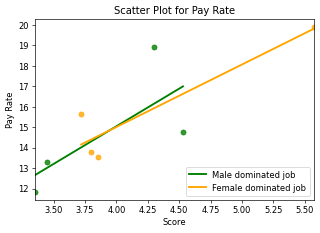

In [40]:
df_I10 = df[df.Gender == 0]
df_I11 = df[df.Gender == 1]

_ = sns.regplot(x='Score', y= 'Pay Rate', data = df_I10, color = 'green', ci = None)
_ = sns.regplot(x='Score', y= 'Pay Rate', data = df_I11, color = 'orange', ci = None)
plt.legend(labels=['Male dominated job', 'Female dominated job'])
plt.title('Scatter Plot for Pay Rate')
plt.xlabel('Score')
plt.ylabel('Pay Rate')
plt.show()

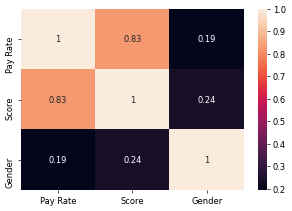

In [41]:
corr = df.corr()
_ = sns.heatmap(corr, annot=True)

Pay Rate = $\beta 0 $ + $\beta 1 $ x1 + $\beta 2 $ x2 + $\epsilon$

In [42]:
y = df['Pay Rate']
xnames = ['Score', 'Gender']
X_ar = np.array([df['Score'], df['Gender']])
X_T =X_ar.T
X = pd.DataFrame(X_T,columns = xnames)
X = sm.add_constant(X)

olsmod = sm.OLS(y, X)
result = olsmod.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               Pay Rate   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.567
Method:                 Least Squares   F-statistic:                     5.583
Date:                Sat, 12 Jun 2021   Prob (F-statistic):             0.0532
Time:                        18:57:14   Log-Likelihood:                -14.420
No. Observations:                   8   AIC:                             34.84
Df Residuals:                       5   BIC:                             35.08
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0067      4.016      0.500      0.6

/Users/wuyunwei/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [43]:
print("Estimated model: y = %0.4f" % (result.params[0]), end = ' ')
for c, x in zip(result.params[1:], list(range(1,len(xnames)+1))):
    print('+', end = '') if c> 0 else print('-', end = '')
    print(" %0.4f x%d " % (abs(c), x), end = '') 

Estimated model: y = 2.0067 + 3.2484 x1 - 0.0389 x2 

### Requirements check. 
The sample size = 8 is too small for building a model with two independent variables.  

### (b)  
In this case male–dominated jobs are paid on average $.039 (3.9 cents) less than female–dominated jobs after adjusting for the value of each job. 
### (c)
合理都給分

# 18.39  
X(independent variable) - Number(x1), Nearest(x2), Office Space(x3), Enrollment(x4), Income(x5), Distance(x6)   
x1 = Total number of motel and hotel rooms within 3 ,iles of La Quinta inn.  
x2 = # of miles to closet competition. 
x3 = Office space in thousands of square feet in surrounding community.  
x4 = College and university enrollment (in thousands) in nearby university or college.  
x5 = Median household income(in $thousands) in surrounding community.  
x6 = Distance(in miles) to downtown core.   
y(dependent variable) - Margin(%)

In [44]:
#讀取資料集
df = pd.read_excel('Xr17-17.xlsx')
df = df.rename(columns={'Office Space': 'Office_Space'})
print('Dataset(head):')
display(df.head())
print('Dataset(tail):')
display(df.tail())

Dataset(head):


,Margin,Number,Nearest,Office_Space,Enrollment,Income,Distance
0,55.5,3203,4.2,549,8.0,37,2.7
1,33.8,2810,2.8,496,17.5,35,14.4
2,49.0,2890,2.4,254,20.0,35,2.6
3,31.9,3422,3.3,434,15.5,38,12.1
4,57.4,2687,0.9,678,15.5,42,6.9


Dataset(tail):


,Margin,Number,Nearest,Office_Space,Enrollment,Income,Distance
95,53.4,2772,0.8,622,14.5,45,11.3
96,35.9,2786,1.9,511,15.5,37,8.5
97,40.0,3397,1.6,855,19.5,32,3.1
98,39.8,3823,3.6,202,17.0,38,4.8
99,35.2,3251,1.7,275,13.0,35,4.3


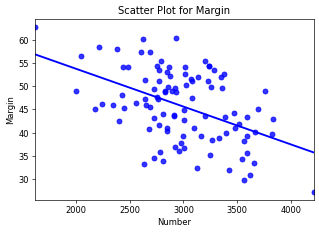

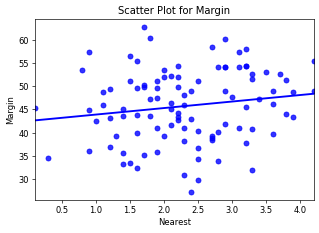

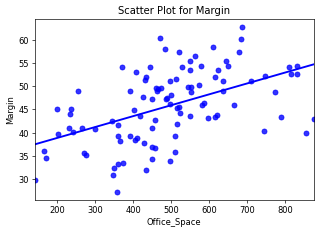

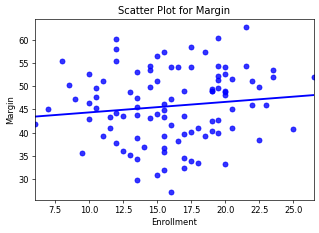

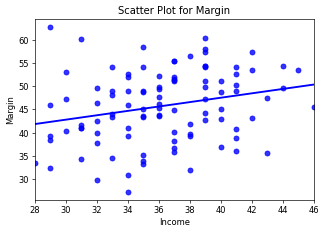

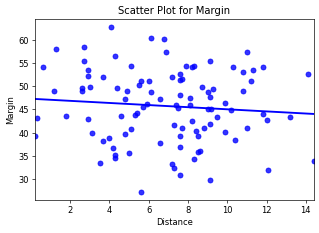

In [45]:
y_var = df['Margin'].values
xnames = ['Number', 'Nearest', 'Office_Space', 'Enrollment', 'Income', 'Distance']
for aname in xnames:
    x_var = df[aname].values
    _ = sns.regplot(x = x_var, y = y_var, data = df, color = 'b', ci = None)
    plt.title('Scatter Plot for Margin')
    plt.xlabel(aname)
    plt.ylabel('Margin')
    plt.show()

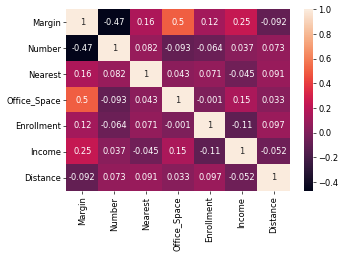

In [46]:
corr = df.corr()
_ = sns.heatmap(corr, annot=True)

Margin = $\beta 0 $ + $\beta 1 $ x1 + $\beta 2 $ x2 + $\beta 3 $ x3 + $\beta 4 $ x4 + $\beta 5 $ x5 + $\beta 6 $ x6 + $\epsilon$

### (a) stepwise

In [47]:
def forward_selection(input_df, depv="y", indepv = ["x1"]):
    selected = []
    candidates = indepv.copy()
    best_adjr2 = -1
    best_subset = []
    while len(candidates) > 0:
        print("Current Candidates: ", candidates)
        tmp_indep_subset = []
        tmp_model_adjr = []
        tmp_model_nindep = []
        for acandidate in candidates:
            tmplist = selected.copy()
            tmplist.append(acandidate)
            modelstr = depv + " ~ " + "+".join(tmplist)
            result6tmp = smf.ols(modelstr, data=input_df).fit()
            tmp_indep_subset.append(tmplist)
            tmp_model_adjr.append(result6tmp.rsquared_adj)
            tmp_model_nindep.append(len(tmplist))
        tmp_adjr2 = np.array(tmp_model_adjr)
        tmpind = tmp_adjr2.argmax()
        this_adjr2 = tmp_adjr2[tmpind]
        selected = tmp_indep_subset[tmpind]
        if this_adjr2 <= 0:
            raise("Encounterd negative Adj R2. Stop.")
        print("===============")
        print("Current best model: ", selected)
        print("Current best AdjR2: ", this_adjr2)
        if this_adjr2 > best_adjr2:
            #print(" best result updated")
            best_adjr2 = this_adjr2
            best_subset = selected
        candidates = set(candidates) - set(selected)
        candidates = list(candidates)
    print("best_adjr2 = ", best_adjr2)
    print("best_subset = ", best_subset)
    modelstr = depv + " ~ " + "+".join(best_subset)
    result6b = smf.ols(modelstr, data=input_df).fit()
    print(result6b.summary()) 

In [48]:
forward_selection(input_df = df, depv = 'Margin', indepv = xnames)

Current Candidates:  ['Number', 'Nearest', 'Office_Space', 'Enrollment', 'Income', 'Distance']
Current best model:  ['Office_Space']
Current best AdjR2:  0.24379437721655084
Current Candidates:  ['Number', 'Distance', 'Income', 'Enrollment', 'Nearest']
Current best model:  ['Office_Space', 'Number']
Current best AdjR2:  0.42062561327487
Current Candidates:  ['Enrollment', 'Distance', 'Income', 'Nearest']
Current best model:  ['Office_Space', 'Number', 'Income']
Current best AdjR2:  0.4540010624616706
Current Candidates:  ['Enrollment', 'Distance', 'Nearest']
Current best model:  ['Office_Space', 'Number', 'Income', 'Nearest']
Current best AdjR2:  0.484982436769995
Current Candidates:  ['Enrollment', 'Distance']
Current best model:  ['Office_Space', 'Number', 'Income', 'Nearest', 'Enrollment']
Current best AdjR2:  0.49125358421028986
Current Candidates:  ['Distance']
Current best model:  ['Office_Space', 'Number', 'Income', 'Nearest', 'Enrollment', 'Distance']
Current best AdjR2:  0.494

### (b) 17.17 regression  

In [49]:
y = df['Margin']
X_ar = np.array([df['Number'], df['Nearest'], df['Office_Space'], df['Enrollment'], df['Income'], df['Distance']])
X_T =X_ar.T
X = pd.DataFrame(X_T,columns = xnames)
X = sm.add_constant(X)

olsmod = sm.OLS(y, X)
result = olsmod.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 Margin   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     17.14
Date:                Sat, 12 Jun 2021   Prob (F-statistic):           3.03e-13
Time:                        18:57:15   Log-Likelihood:                -308.96
No. Observations:                 100   AIC:                             631.9
Df Residuals:                      93   BIC:                             650.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           38.1386      6.993      5.454   

In [50]:
print("Estimated model: y = %0.4f" % (result.params[0]), end = ' ')
for c, x in zip(result.params[1:], list(range(1,len(xnames)+1))):
    print('+', end = '') if c> 0 else print('-', end = '')
    print(" %0.4f x%d " % (abs(c), x), end = '') 

Estimated model: y = 38.1386 - 0.0076 x1 + 1.6462 x2 + 0.0198 x3 + 0.2118 x4 + 0.4131 x5 - 0.2253 x6 

### Requirements check. 
#### Multicollinearity  
No correlation between independent variables is larger than 0.7.  
And no variable has different signs for correlation coefficients and coefficients.  
Thus, Multicollinearity prolblem doesnt exist.  

In [51]:
st, data, ss2 = sso.summary_table(result, alpha=0.05)
#Predicted value
y_pre = data[:, 2]
#Studentized Residual
SD = data[:, 10]

#### Normality
H0 : Normal distributed  
H1 : Not normal distributed 

In [52]:
stat, p = stats.shapiro(SD)
print('Shapiro Test: Statistics=%f, p=%f' % (stat, p))

Shapiro Test: Statistics=0.982497, p=0.207033


Since p-value > alpha = 0.05, we can not reject H0 at significance level at alpha = 0.05.  
There is no evidence to show that it is not normally distributed.  
#### Homoscedasticity
H0 : Homoscedasticity  
H1 : Not Homoscedasticity

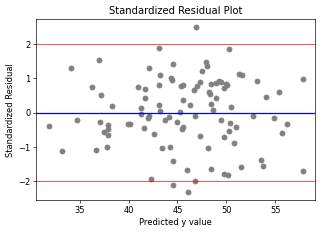

In [53]:
plt.plot(y_pre, SD, 'o', color = 'gray')
plt.axhline(y=2, color = 'red', lw = 0.8)
plt.axhline(y=0, color = 'blue')
plt.axhline(y=-2, color = 'red', lw = 0.8)
plt.title('Standardized Residual Plot')
plt.xlabel('Predicted y value')
plt.ylabel('Standardized Residual')
plt.show()

We do not reject H0. We can assume the variation is constant and the mean is around 0.
#### Independence
H0 : Independence  
H1 : Not independence  

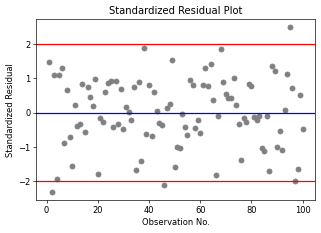

runs =  48
n1 =  50
n2 =  50
runs_exp =  51.0
stan_dev =  4.97468338163091
z =  -0.603053454834441
pval_z =  0.5464731290798559
p_value for Z-statistic=  0.5464731290798559


In [54]:
Id = data[:, 0]
plt.plot(Id, SD, 'o', color = 'gray')
plt.axhline(y=0, color = 'blue')
plt.axhline(y=2, color = 'red')
plt.axhline(y=-2, color = 'red')
plt.title('Standardized Residual Plot')
plt.xlabel('Observation No.')
plt.ylabel('Standardized Residual')
plt.show()

SD_median = statistics.median(SD)
Z_pval = runsTest(SD, SD_median) 
print('p_value for Z-statistic= ', Z_pval)

Since n1>20 and n2>20, we apply run test with normal dist.  
The p-value>alpha = 0.05, we can not reject H0.  
Thus, there is no evidence to infer the sample is not random selected.  

#### Autocorreltaion
H0: The data are not first-order correlated  
H1: The data are first-order correlated  


In [55]:
d = Durbin_Watson_test(SD)
print(d)

x_square_sum =  99.88581315094798
size =  100
x_d =  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
x_d =  [ 0.         -3.78510899  3.39592379 -3.03695165  3.03518566  0.22820085
 -2.21045556  1.5472977  -1.35782229 -0.86072658  1.77462208 -0.59824753
  0.07189745  1.14328682 -1.39381589  1.30704295 -0.27348915 -0.28094632
  0.8096803  -2.77404481  1.62827365 -0.10750944  0.84852338  0.29069858
  0.0453651  -1.3451199   1.33792462 -1.24918811  1.00965129 -1.16886172
  0.6613829  -0.14382197 -0.24906064  0.95876997 -2.41651492  2.57603982
 -2.29801097  3.2771887  -2.49556443  1.44133925 -1.49095663  1.28175192
 -0.55947094 -0.34930893 -0.0534034  -1.75660778  2.23634579  0.12951622
  1.27717579 -3.11174346  0.57343505 -0.0373771   

size = 100, k = 7, dL = 1.4895, dU = 1.7413  
Since dU < d= 2.1289390131271597 < 4-dU, we can not reject H0.  
Thus, there is not enough evidence to infer that first order auto-correlation exist.

#### Outliers 

In [56]:
df_c = pd.DataFrame(SD,columns = ['SD'])
filter = (df_c['SD'] < -2) | (df_c['SD'] > 2)
print("Outliers by SD = \n")
print(df_c['SD'].loc[filter])

Outliers by SD = 

1    -2.310721
45   -2.110574
94    2.501603
Name: SD, dtype: float64


#### Influential Observations

In [57]:
X = np.array(X)
H = np.matmul(X, np.linalg.solve(np.matmul(X.T, X), X.T))
df['hii'] = np.diagonal(H)
df_h = pd.DataFrame(df['hii'])
k = result.df_model
n = len(df_h['hii'])
h_level = 3 * (k+1) / n 
print("h_level = ", h_level)
print(" \n")
filter = (df_h['hii'] > h_level )
print("Influential Observations by hi = \n")
print(df_h['hii'].loc[filter])

h_level =  0.21
 

Influential Observations by hi = 

Series([], Name: hii, dtype: float64)


In [58]:
s2_e = result.mse_resid
k = result.df_model
y_a = data[:, 1]
y_f = data[:, 2]
h_i = df['hii']
CD_arr = np.square(y_a - y_f) / s2_e / (k - 1) * h_i / np.square(1 - h_i)
CD = np.array(CD_arr)
df_cd = pd.DataFrame(CD,columns = ['CD'])
filter = (df_cd['CD'] > 1 )
print("Influential Observations by Cook's Distances = \n")
print(df_cd['CD'].loc[filter])

Influential Observations by Cook's Distances = 

Series([], Name: CD, dtype: float64)


The results from two methods are the same.

# 18.47   
X(independent variable) - BA(x1), ERA(x2), I1(x3)   
y(dependent variable) - Win Pct(%)  
x1 = batting average   
x2 = earned run average.  
I1 = 1 if fired manager, = 0 otherwise  

In [59]:
#讀取資料集
df = pd.read_excel('Xr18-47.xlsx')
print('Dataset(head):')
display(df.head())
print('Dataset(tail):')
display(df.tail())

Dataset(head):


,Win Pct,BA,ERA,Fired
0,0.512,0.255,3.92,1
1,0.463,0.262,3.07,0
2,0.601,0.279,4.31,0
3,0.457,0.253,3.30,1
4,0.550,0.280,3.88,0


Dataset(tail):


,Win Pct,BA,ERA,Fired
45,0.480,0.271,3.07,0
46,0.522,0.270,3.79,0
47,0.411,0.263,2.29,0
48,0.577,0.259,3.70,0
49,0.558,0.271,4.31,0


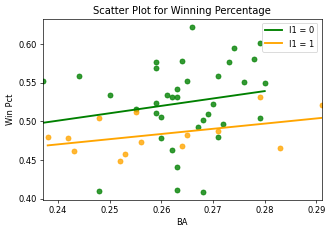

In [60]:
df_I10 = df[df.Fired == 0]
df_I11 = df[df.Fired == 1]

_ = sns.regplot(x='BA', y= 'Win Pct', data = df_I10, color = 'green', ci = None)
_ = sns.regplot(x='BA', y= 'Win Pct', data = df_I11, color = 'orange', ci = None)

plt.legend(labels=['I1 = 0', 'I1 = 1'])
plt.title('Scatter Plot for Winning Percentage')
plt.xlabel('BA')
plt.ylabel('Win Pct')
plt.show()

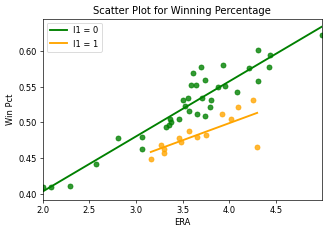

In [61]:
df_I10 = df[df.Fired == 0]
df_I11 = df[df.Fired == 1]

_ = sns.regplot(x='ERA', y= 'Win Pct', data = df_I10, color = 'green', ci = None)
_ = sns.regplot(x='ERA', y= 'Win Pct', data = df_I11, color = 'orange', ci = None)

plt.legend(labels=['I1 = 0', 'I1 = 1'])
plt.title('Scatter Plot for Winning Percentage')
plt.xlabel('ERA')
plt.ylabel('Win Pct')
plt.show()

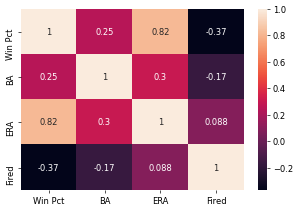

In [62]:
corr = df.corr()
_ = sns.heatmap(corr, annot=True)

Win Pct = $\beta 0 $ + $\beta 1 $ x1 + $\beta 2 $ x2 + $\beta 3 $ x3 + $\epsilon$

In [63]:
y = df['Win Pct']
xnames = ['BA', 'ERA', 'Fired']
X_ar = np.array([df['BA'], df['ERA'], df['Fired']])
X_T =X_ar.T
X = pd.DataFrame(X_T,columns = xnames)
X = sm.add_constant(X)

olsmod = sm.OLS(y, X)
result = olsmod.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                Win Pct   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     106.0
Date:                Sat, 12 Jun 2021   Prob (F-statistic):           1.12e-20
Time:                        18:57:15   Log-Likelihood:                 131.15
No. Observations:                  50   AIC:                            -254.3
Df Residuals:                      46   BIC:                            -246.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3571      0.059      6.030      0.0

In [64]:
print("Estimated model: y = %0.4f" % (result.params[0]), end = ' ')
for c, x in zip(result.params[1:], list(range(1,len(xnames)+1))):
    print('+', end = '') if c> 0 else print('-', end = '')
    print(" %0.4f x%d " % (abs(c), x), end = '') 

Estimated model: y = 0.3571 - 0.4005 x1 + 0.0764 x2 - 0.0509 x3 

### Requirements check. 
#### Multicollinearity  
No correlation between indenpendent variables is larger than 0.7.  
But the signs for BA's correlation coefficients and coefficients are different.  
Thus, Multicollinearity prolblem exists.  

In [65]:
st, data, ss2 = sso.summary_table(result, alpha=0.05)
#Predicted value
y_pre = data[:, 2]
#Studentized Residual
SD = data[:, 10]

#### Normality
H0 : Normal distributed  
H1 : Not normal distributed 

In [66]:
stat, p = stats.shapiro(SD)
print('Shapiro Test: Statistics=%f, p=%f' % (stat, p))

Shapiro Test: Statistics=0.963031, p=0.119084


Since p-value > alpha = 0.05, we can not reject H0 at significance level at alpha = 0.05.  
There is no evidence to show that it is not normally distributed.  
#### Homoscedasticity
H0 : Homoscedasticity  
H1 : Not Homoscedasticity

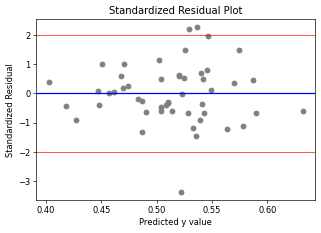

In [67]:
plt.plot(y_pre, SD, 'o', color = 'gray')
plt.axhline(y=2, color = 'red', lw = 0.8)
plt.axhline(y=0, color = 'blue')
plt.axhline(y=-2, color = 'red', lw = 0.8)
plt.title('Standardized Residual Plot')
plt.xlabel('Predicted y value')
plt.ylabel('Standardized Residual')
plt.show()

We do not reject H0. We can assume the variation is constant and the mean is around 0.
#### Independence
H0 : Independence  
H1 : Not independence  

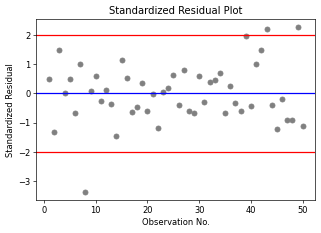

runs =  30
n1 =  25
n2 =  25
runs_exp =  26.0
stan_dev =  3.499271061118826
z =  1.1430952132988164
pval_z =  0.2529990614746843
p_value for Z-statistic=  0.2529990614746843


In [68]:
Id = data[:, 0]
plt.plot(Id, SD, 'o', color = 'gray')
plt.axhline(y=0, color = 'blue')
plt.axhline(y=2, color = 'red')
plt.axhline(y=-2, color = 'red')
plt.title('Standardized Residual Plot')
plt.xlabel('Observation No.')
plt.ylabel('Standardized Residual')
plt.show()

SD_median = statistics.median(SD)
Z_pval = runsTest(SD, SD_median) 
print('p_value for Z-statistic= ', Z_pval)

Since n1>20 and n2>20, we apply run test with normal dist.  
The p-value>alpha = 0.05, we can not reject H0.  
Thus, there is no evidence to infer the sample is not random selected.  

#### Autocorreltaion
H0: The data are not first-order correlated  
H1: The data are first-order correlated  

In [69]:
d = Durbin_Watson_test(SD)
print(d)

x_square_sum =  50.160718736498104
size =  50
x_d =  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
x_d =  [ 0.00000000e+00 -1.80276317e+00  2.81932743e+00 -1.49560333e+00
  4.84298858e-01 -1.16039688e+00  1.68469208e+00 -4.36112736e+00
  3.42711871e+00  5.15912268e-01 -8.51440974e-01  3.65201863e-01
 -4.68730251e-01 -1.08544934e+00  2.60977740e+00 -6.36874245e-01
 -1.14734362e+00  1.71339468e-01  8.21031773e-01 -9.69283752e-01
  5.97106277e-01 -1.17659464e+00  1.23838198e+00  1.37833163e-01
  4.49980247e-01 -1.03458168e+00  1.18967489e+00 -1.38284217e+00
 -7.73457952e-02  1.24453643e+00 -8.86980123e-01  7.00388024e-01
  7.70338740e-02  2.20189523e-01 -1.35050179e+00  9.08819808e-01
 -5.77134969e-01 -2.66757248e-01  2.55589749e+00 -2.40961558e+00
  1.45665876e+00  4.68431700e-01  7.29889926e-01 -2.61770501e+00
 -7.97780069e-01  1.02945951e+00 -7.44477625e-01 -2.28726147e-03
  3.19

size = 50, k = 4, dL = 1.3385, dU = 1.5884  
Since dU < d= 2.4169999256216084 < 4-dU, we can not reject H0.  
Thus, there is not enough evidence to infer that first order auto-correlation exist.

#### Outliers 

In [70]:
df_c = pd.DataFrame(SD,columns = ['SD'])
filter = (df_c['SD'] < -2) | (df_c['SD'] > 2)
print("Outliers by SD = \n")
print(df_c['SD'].loc[filter])

Outliers by SD = 

7    -3.360761
42    2.202966
48    2.267628
Name: SD, dtype: float64


#### Influential Observations

In [71]:
X = np.array(X)
H = np.matmul(X, np.linalg.solve(np.matmul(X.T, X), X.T))
df['hii'] = np.diagonal(H)
df_h = pd.DataFrame(df['hii'])
k = result.df_model
n = len(df_h['hii'])
h_level = 3 * (k+1) / n 
print("h_level = ", h_level)
print(" \n")
filter = (df_h['hii'] > h_level )
print("Influential Observations by hi = \n")
print(df_h['hii'].loc[filter])

h_level =  0.24
 

Influential Observations by hi = 

Series([], Name: hii, dtype: float64)


In [72]:
s2_e = result.mse_resid
k = result.df_model
y_a = data[:, 1]
y_f = data[:, 2]
h_i = df['hii']
CD_arr = np.square(y_a - y_f) / s2_e / (k - 1) * h_i / np.square(1 - h_i)
CD = np.array(CD_arr)
df_cd = pd.DataFrame(CD,columns = ['CD'])
filter = (df_cd['CD'] > 1 )
print("Influential Observations by Cook's Distances = \n")
print(df_cd['CD'].loc[filter])

Influential Observations by Cook's Distances = 

7    1.03295
Name: CD, dtype: float64


### (b)  
H0 : $\beta 3$  = 0   
H1 : $\beta 3$  < 0   
$\alpha$ = 0.05  
Since p-value 0/2 = 0, we can reject H0 at significance level at alpha = 0.05.  
There is enough evidence to infer that a team that fires its manager within 12 months wins less frequently than other teams.